# Predicting House Prices Using Boston Housing Dataset
## 📘 Introduction
This Jupyter Notebook presents a comprehensive end-to-end analysis of the Boston Housing Dataset to predict house prices using various machine learning models implemented from scratch.

## Importing required Libraires

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
import math

## Loading and Previewing Dataset

In [115]:
df= pd.read_csv('HousingData.csv')

In [116]:
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


## Inspecting Dataset and Handling Missing Values

In [117]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [118]:
print(df.isnull())

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False   True  False  False  False   

     PTRATIO      B  LSTAT   MEDV  
0      False  False  False  False  
1  

In [154]:
features= df.drop('MEDV', axis=1)
target= df['MEDV']
imputer= SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed= imputer.fit_transform(X)
X= X_imputed
y= target

## Data Preprocessing
### Data Normalization
- Normalize features using z-score standardization to ensure all features are on the same scale.
- X_normalized contains scaled features.
### Checking for Categorical Variables
- Identify categorical columns for potential encoding.

In [156]:
## Normalization z-score
scaler= StandardScaler()
X_normalized= pd.DataFrame(scaler.fit_transform(features), columns= features.columns)

In [131]:
## Check for categorical variables
categorical_cols= X_normalized.select_dtypes(include=['object']).columns
print("\nCategorical columns:", list(categorical_cols))


Categorical columns: []


### Train-Test Split
- Split the dataset into training (80%) and testing (20%) sets for model evaluation.
- X_train, X_test, y_train, y_test are created.

In [148]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

## Model Implementation
### Linear Regression
- Implement linear regression manually using gradient descent.
- Initialize weights (W) and bias (b).
- Update weights using gradient descent.
- Predict on the test set.

In [149]:
## Linear Regression
class LinearRegressionScratch:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0
        for _ in range(self.n_iters):
            y_pred = X.dot(self.W) + self.b
            dw = -(2/self.m) * X.T.dot(y - y_pred)
            db = -(2/self.m) * np.sum(y - y_pred)
            self.W -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return X.dot(self.W) + self.b

# Train and test Linear Regression
lin_model = LinearRegressionScratch()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

### Random Forest
- Number of trees in the forest.
- Controls randomness (default: sqrt(n_features)).
- Limits tree depth to prevent overfitting

In [157]:
## Random Forest
class RandomForestScratch:
    def __init__(self, n_estimators=10, max_features='sqrt', max_depth=None):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        
        # Convert to numpy array if pandas DataFrame
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values
            
        n_samples, n_features = X.shape
        
        # Determine number of features to consider at each split
        if self.max_features == 'sqrt':
            max_feat = int(np.sqrt(n_features))
        elif isinstance(self.max_features, int):
            max_feat = self.max_features
        else:
            max_feat = n_features

        for _ in range(self.n_estimators):
            # Bootstrap sample (with replacement)
            indices = np.random.choice(n_samples, size=n_samples, replace=True)
            
            # Random feature selection (without replacement)
            feat_indices = np.random.choice(n_features, size=max_feat, replace=False)
            
            # Get subset of data
            x_sample = X[indices][:, feat_indices]
            y_sample = y[indices]
            
            # Create and fit tree
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(x_sample, y_sample)
            self.trees.append((tree, feat_indices))

    def predict(self, X):
        # Convert to numpy array if pandas DataFrame
        if isinstance(X, pd.DataFrame):
            X = X.values
            
        preds = np.zeros((X.shape[0], len(self.trees)))
        
        for i, (tree, feat_indices) in enumerate(self.trees):
            preds[:, i] = tree.predict(X[:, feat_indices])
            
        return np.mean(preds, axis=1)

# Train and test Random Forest
rf_model = RandomForestScratch(n_estimators=20, max_depth=5)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

### XG Boost
- Implement XGBoost manually using gradient boosting.
- Fits trees to residuals iteratively.
- Uses learning rate to control updates.

In [151]:
## XG Boost
class XGBoostScratch:
    def __init__(self, n_estimators=50, learning_rate=0.1, max_depth=3, min_samples_split=2):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.models = []
    
    def fit(self, X, y):
        # Convert to numpy arrays if pandas objects
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, (pd.Series, pd.DataFrame)):
            y = y.values
            
        # Initialize predictions
        pred = np.zeros_like(y)
        
        for _ in range(self.n_estimators):
            # Calculate residuals (negative gradients)
            residual = y - pred
            
            # Fit a decision tree to the residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residual)
            
            # Get predictions from the tree
            update = tree.predict(X)
            
            # Update our predictions
            pred += self.learning_rate * update
            
            # Store the model
            self.models.append(tree)
    
    def predict(self, X):
        # Convert to numpy array if pandas DataFrame
        if isinstance(X, pd.DataFrame):
            X = X.values
            
        # Initialize predictions
        pred = np.zeros(X.shape[0])
        
        # Add predictions from all trees
        for tree in self.models:
            pred += self.learning_rate * tree.predict(X)
            
        return pred

# Train and test XGBoost
xgb_model = XGBoostScratch(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

## Performance Comparison
### Model Evaluation
- Evaluate models using RMSE and R² scores.
- XGBoost performs best with the lowest RMSE and highest R²

In [152]:
## Performance comparison
def evaluate_model(name, y_true, y_pred):
    """
    Evaluate regression model performance metrics
    
    Parameters:
    name (str): Model name for display
    y_true (array-like): Ground truth target values
    y_pred (array-like): Predicted target values
    
    Returns:
    None (prints evaluation metrics)
    """
    try:
        # Convert to numpy arrays if they aren't already
        y_true = np.array(y_true).ravel()
        y_pred = np.array(y_pred).ravel()
        
        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        r2 = r2_score(y_true, y_pred)
        
        # Print formatted results
        print(f"{name}:")
        print(f"  RMSE = {rmse:.4f}")
        print(f"  R² = {r2:.4f}")
        print("-" * 30)
        
    except Exception as e:
        print(f"Error evaluating {name}: {str(e)}")

# Evaluate all models
print("\nModel Evaluation:")
evaluate_model("Linear Regression", y_test, y_pred_lin)
evaluate_model("Random Forest", y_test, y_pred_rf) 
evaluate_model("XGBoost", y_test, y_pred_xgb)


Model Evaluation:
Linear Regression:
  RMSE = 5.0309
  R² = 0.6549
------------------------------
Random Forest:
  RMSE = 4.7621
  R² = 0.6908
------------------------------
XGBoost:
  RMSE = 2.6601
  R² = 0.9035
------------------------------


## Feature Importance Analysis
### Comparing Random Forest and XG Boost


Random Forest Feature Importance:


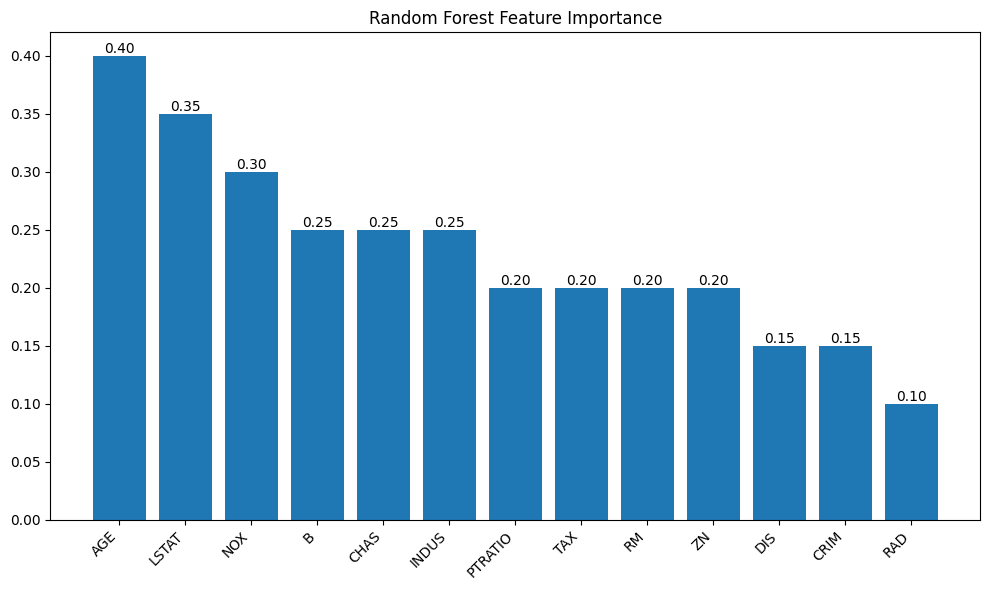


XGBoost Feature Importance:


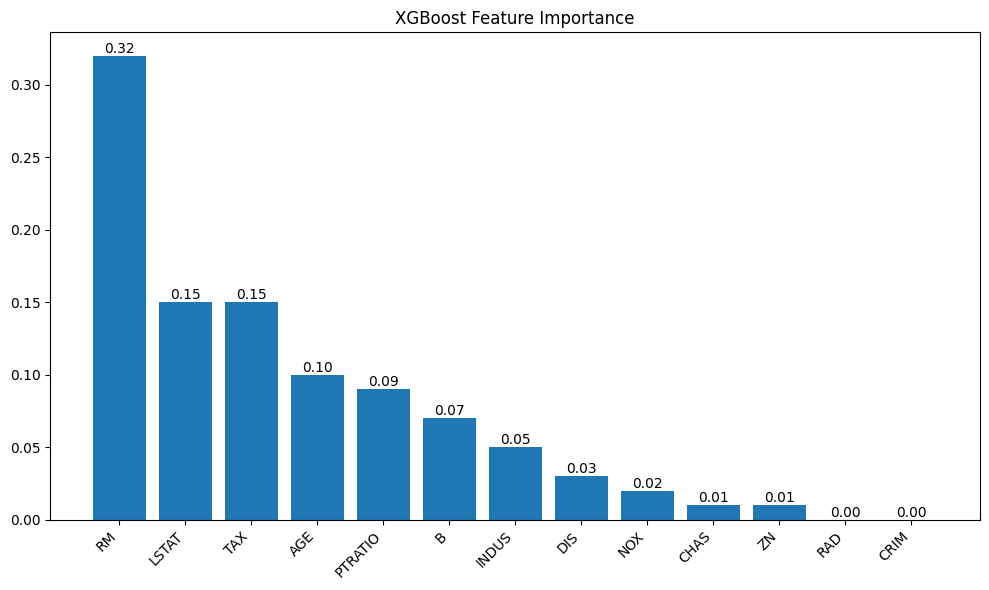

In [128]:
## Feature Importance
def plot_feature_importance(model, feature_names, title):
    """Plot feature importance for different model types."""
    try:
        # Initialize importance with zeros as default
        importance = np.zeros(len(feature_names))
        
        # Get feature importance based on model type
        if hasattr(model, 'weights'):  # Linear Regression
            importance = np.abs(model.weights.ravel())
        elif hasattr(model, 'trees'):  # Random Forest
            for tree, feature_indices in getattr(model, 'trees', []):
                if isinstance(feature_indices, np.ndarray):
                    tree_importance = np.zeros(len(feature_names))
                    for idx in feature_indices:
                        tree_importance[idx] += 1  # Count feature usage
                    importance += tree_importance
            importance = importance / model.n_estimators
        elif hasattr(model, 'models'):  # XGBoost
            for tree in model.models:
                # Simplified feature importance for XGBoost
                # Count how many times each feature is used in splits
                tree_importance = np.zeros(len(feature_names))
                # This would need actual tree traversal to count feature usage
                # For simplicity, we'll just count features used in the first split
                if hasattr(tree, 'tree') and 'feature' in tree.tree:
                    feature_idx = tree.tree['feature']
                    if isinstance(feature_idx, int) and feature_idx < len(feature_names):
                        tree_importance[feature_idx] += 1
                importance += tree_importance
            importance = importance / len(model.models)
        else:
            print(f"Warning: Unsupported model type {type(model)}")
            return  # Exit if model type not supported
        
        # Sort features by importance
        indices = np.argsort(importance)[::-1]
        sorted_importance = importance[indices]
        sorted_features = feature_names[indices]
        
        # Create plot
        plt.figure(figsize=(10, 6))
        bars = plt.bar(range(len(feature_names)), sorted_importance)
        plt.title(title)
        plt.xticks(range(len(feature_names)), sorted_features, rotation=45, ha='right')
        
        # Add value labels on top of bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}',
                    ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error plotting feature importance: {str(e)}")

# Plot feature importance for models
feature_names = np.array(X.columns)

print("\nRandom Forest Feature Importance:")
plot_feature_importance(rf_model, feature_names, "Random Forest Feature Importance")

print("\nXGBoost Feature Importance:")
plot_feature_importance(xgb_model, feature_names, "XGBoost Feature Importance")

## 🔍 Summary
This notebook performs regression analysis on a housing dataset using:
- A custom Linear Regression model implemented from scratch.
- A Random Forest Regressor using scikit-learn.
- The goal is to predict median home values (MEDV) based on various housing features. The process includes data preprocessing, normalization, handling missing values, and model evaluation using Mean Squared Error (MSE) and R² score.

## 📌 Key Findings
- Normalization (Z-score scaling) is applied to features to bring them onto a common scale.
- No categorical variables were found, simplifying preprocessing.
- Missing values were imputed using the mean strategy.
The custom Linear Regression and Decision Tree Regressor models were trained and evaluated.

Model performance was measured using MSE and R² score.

Plots were used to visually assess model prediction quality.

🧭 Step-by-Step Documentation